# 0 Load Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.feature_selection import chi2
from scipy import stats


# 1 Data Preprocessing

## 1.1 Know your data

### 1.1.1 Show the first 5 records

In [2]:
df = pd.read_csv("D:\Data-Science\Course\IE7374\Projects\ml_project\in-vehicle-coupon-recommendation.csv")
df.head()
df.describe()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 1.1.2 Dimension

In [3]:
df.shape

(12684, 26)

### 1.1.3 Features Explanations

### 1.1.4 Features Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.1.5 Null or not

In [6]:
df.isnull().sum() / df.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

## 1.2 Data Cleaning and transformation

### 1.2.1 Drop car column

In [7]:
df.drop(columns='car', inplace=True)
# df.columns

### 1.2.2 Set data type as category

In [8]:
df = df.astype('category')
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children            category
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min        category
toCoupon_GEQ15min       category
toCoupon_GEQ25min       category
direction_same          category
direction_opp           category
Y                       category
dtype: object

### 1.2.2 Impute lack data

[Ref](https://jamesrledoux.com/code/imputation#:~:text=One%20approach%20to%20imputing%20categorical,given%20in%20Pandas'%20value_counts%20function.)

In [9]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum().sum()

0

## 2 Exploratory Data Analysis

## 2.1 Coupon acception vs. reject

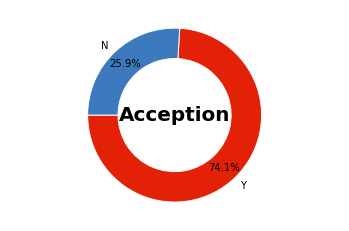

In [10]:
def make_pie(sizes, text,colors,labels):
    import matplotlib.pyplot as plt
    import numpy as np

    col = [[i/255. for i in c] for c in colors]

    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180, autopct='%1.1f%%')
    outside, _, _ = ax.pie(sizes, radius=1, pctdistance=1-width/2,
                       labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    plt.show()

c1 = (226,33,7)
c2 = (60,121,189)

make_pie([257,90], "Acception",[c1,c2],['Y','N'])


## 2.2 Which feature will be indepedent of target?

[Ref](https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjFiZDY4NWY1ZThmYzYyZDc1ODcwNWMxZWIwZThhNzUyNGM0NzU5NzUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTc1NzcwNTcsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjk2NjQyODk4MDIxNTU1MjE0OSIsImVtYWlsIjoieWFubWluZ2xpdTIxQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiWWFubWluZyBMaXUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUl0YnZtbW1DdnlEVzktaWF0dXQzYXhlQWFlZGpIWV9TY2laNWI4M3dfLTY9czk2LWMiLCJnaXZlbl9uYW1lIjoiWWFubWluZyIsImZhbWlseV9uYW1lIjoiTGl1IiwiaWF0IjoxNjU3NTc3MzU3LCJleHAiOjE2NTc1ODA5NTcsImp0aSI6IjhmMmJjM2MwOTk2NDZmMDdiODBhYTZmNWE5OGY5ZGU0YTk3YzAxMTQifQ.Tvz3S-XbT029APxcmsPETDBUj8S1ir0iYejfv9QbpWLtuCDYwxxbDuQv1FCL9Wz_D8hmxPutvuOgrF-dFT5oMYTq6rn0hV8Z0UNNn8rBR_KofiuSx10ChpZgJfmMAtqccsfW20Yk__v_xvZPNOLnjiHdXZAtoQiWUNo9VFAZ58NM98KjLfkkJ0r715iuIQrnyzWnUnabgwO96GT1OTaLynipdg6ugvClNENa3WZIncBtdqlP4jeTE7QOEPnTMRUntHGCTj5VRsnJRYt3OYpE6BqQgANptFUygI-K47IM5WSAicSFzmxyp9CgJxQ3U4d4S3LPKqiBy63v7gkxkLJPhQ)

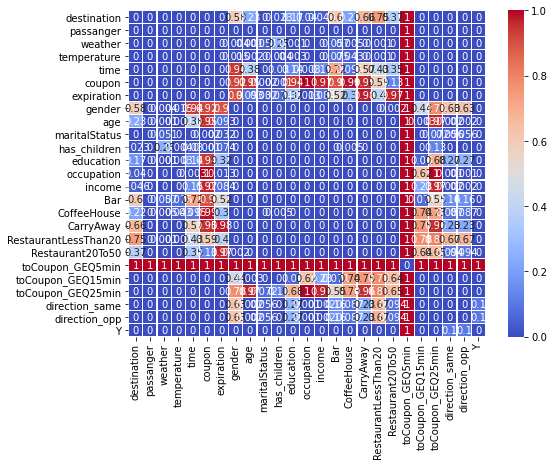

In [19]:
# https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjFiZDY4NWY1ZThmYzYyZDc1ODcwNWMxZWIwZThhNzUyNGM0NzU5NzUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTc1NzcwNTcsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjk2NjQyODk4MDIxNTU1MjE0OSIsImVtYWlsIjoieWFubWluZ2xpdTIxQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiWWFubWluZyBMaXUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUl0YnZtbW1DdnlEVzktaWF0dXQzYXhlQWFlZGpIWV9TY2laNWI4M3dfLTY9czk2LWMiLCJnaXZlbl9uYW1lIjoiWWFubWluZyIsImZhbWlseV9uYW1lIjoiTGl1IiwiaWF0IjoxNjU3NTc3MzU3LCJleHAiOjE2NTc1ODA5NTcsImp0aSI6IjhmMmJjM2MwOTk2NDZmMDdiODBhYTZmNWE5OGY5ZGU0YTk3YzAxMTQifQ.Tvz3S-XbT029APxcmsPETDBUj8S1ir0iYejfv9QbpWLtuCDYwxxbDuQv1FCL9Wz_D8hmxPutvuOgrF-dFT5oMYTq6rn0hV8Z0UNNn8rBR_KofiuSx10ChpZgJfmMAtqccsfW20Yk__v_xvZPNOLnjiHdXZAtoQiWUNo9VFAZ58NM98KjLfkkJ0r715iuIQrnyzWnUnabgwO96GT1OTaLynipdg6ugvClNENa3WZIncBtdqlP4jeTE7QOEPnTMRUntHGCTj5VRsnJRYt3OYpE6BqQgANptFUygI-K47IM5WSAicSFzmxyp9CgJxQ3U4d4S3LPKqiBy63v7gkxkLJPhQ
df = df.astype('object')
column_names=df.columns

chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)


outercnt=0
innercnt=0
for icol in column_names:
    for jcol in column_names:
       mycrosstab=pd.crosstab(df[icol],df[jcol])
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       innercnt=innercnt+1
    outercnt=outercnt+1
    innercnt=0
    

plt.figure(figsize = (8,6))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, 
            cmap='coolwarm')

## 2.3 How do the rest of feature will influence the target ?

[Ref](https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib)

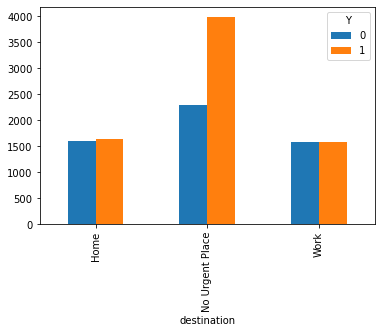

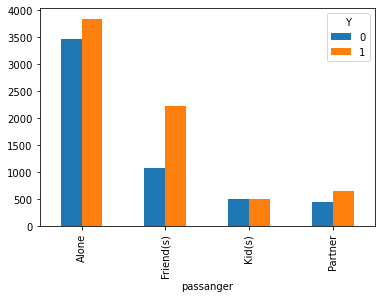

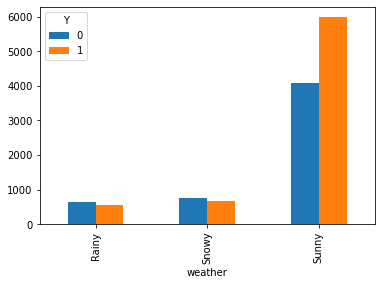

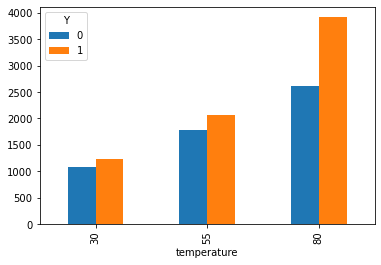

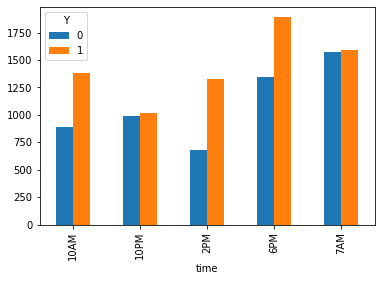

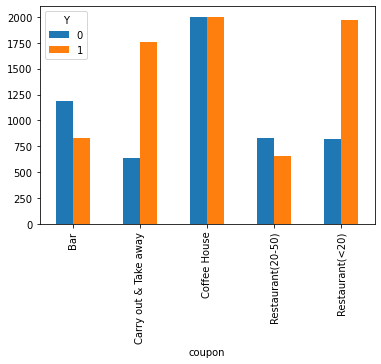

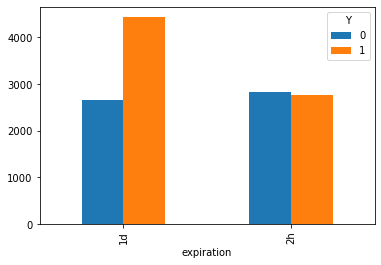

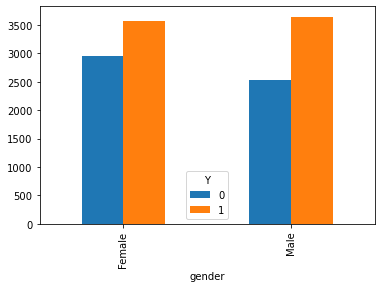

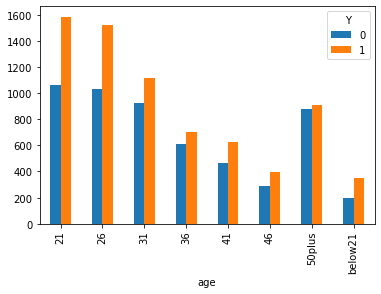

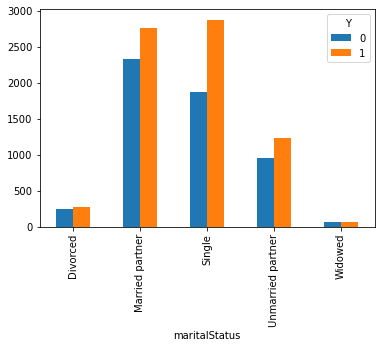

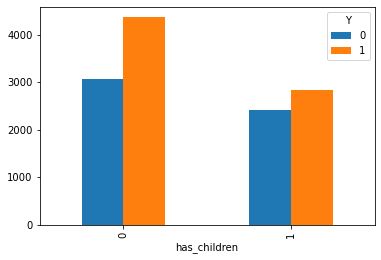

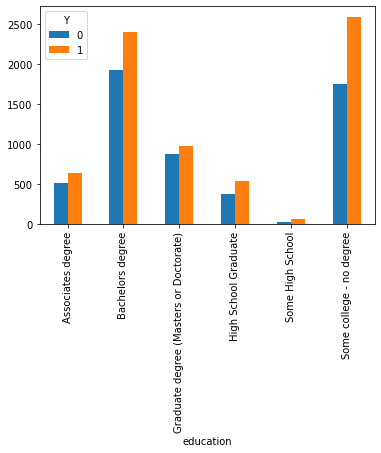

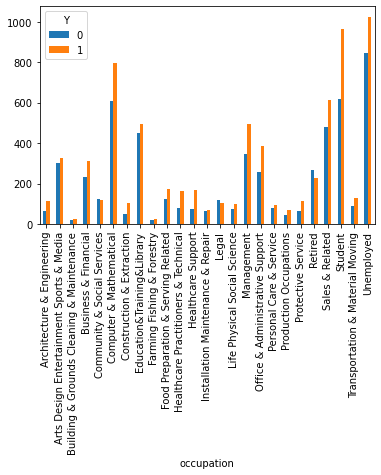

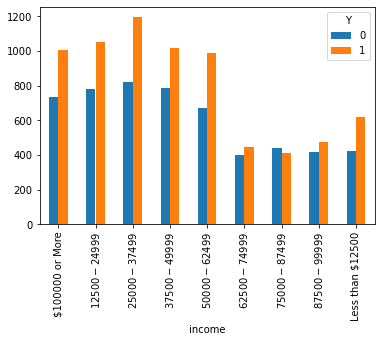

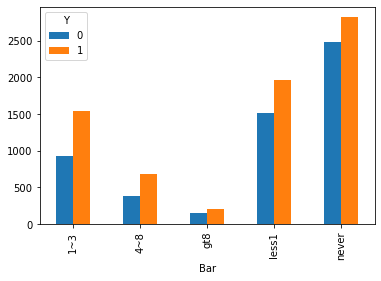

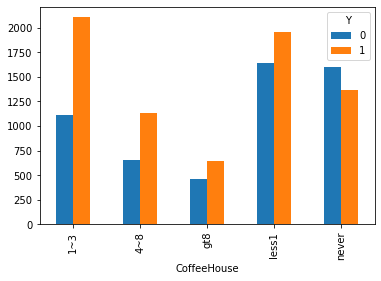

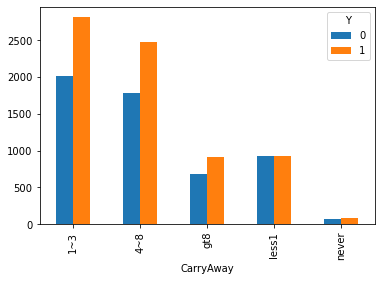

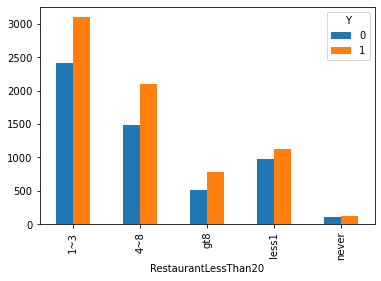

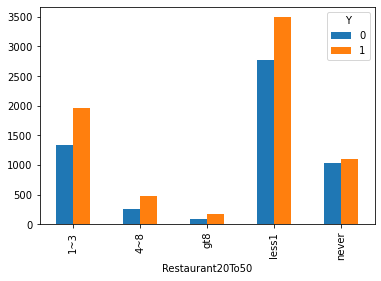

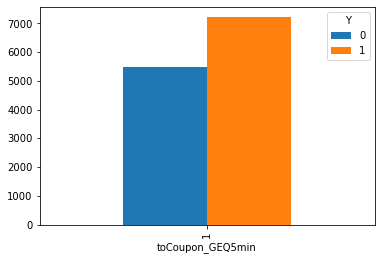

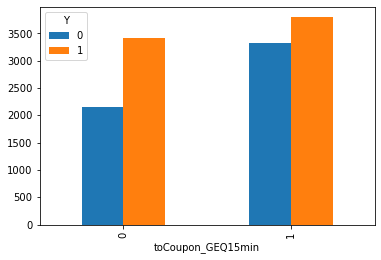

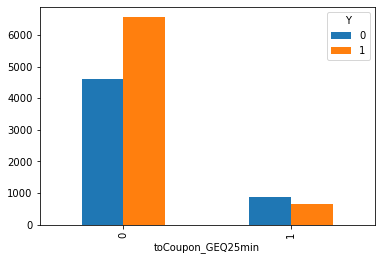

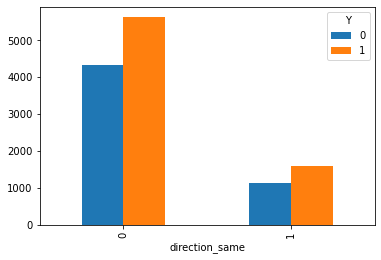

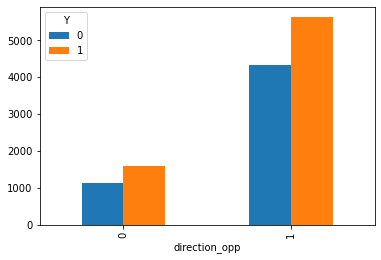

In [20]:
count = 0
target = df.columns[-1]
for cat_val in df.columns:
  if cat_val == target: 
    continue
  temp_df = df.loc[:, [cat_val, target]]  
  temp_df = temp_df.groupby([cat_val, target]).size().reset_index(name='count')
  pivot_df = pd.pivot_table(temp_df, values='count', index=cat_val, columns=target)
  pivot_df.plot(kind='bar')
  count += 1